##### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

###### Problem Statement - Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

##### The company wants to understand the following :
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [603]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [604]:
# reading the dataset and storing in dataframe house price called HP
hp = pd.read_csv("train.csv")

In [605]:
# summary of the dataset: 1460 rows, 80 columns, many null values
print(hp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [606]:
### There are multiple columns with NA/Null/NAN values 
### And as per Data Dictionary those missing NA values can be imputed with appropriae values
### Checking Coulns with Null Values given by info function abave and imputing as per Data Dictionary
### Handling PoolQC , Alley , MiscFeature and fence first

hp['PoolQC'] = hp['PoolQC'].fillna('No Pool')
hp['Alley'] = hp['Alley'].fillna('No alley access')
hp['MiscFeature'] = hp['MiscFeature'].fillna('None')
hp['Fence'] = hp['Fence'].fillna('No Fence')
print(hp['PoolQC'].value_counts())
print(hp['Alley'].value_counts())
print(hp['MiscFeature'].value_counts())
print(hp['Fence'].value_counts())



No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64
No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


In [607]:
#### Handling variables related to Garage , fireplace and imputing values from data dictonary

hp['GarageCond'] = hp['GarageCond'].fillna('No Garage')
hp['GarageQual'] = hp['GarageQual'].fillna('No Garage')
hp['GarageType'] = hp['GarageType'].fillna('No Garage')
hp['FireplaceQu'] = hp['FireplaceQu'].fillna('No Fireplace')
hp['GarageFinish'] = hp['GarageFinish'].fillna('No Garage')

print(hp['GarageCond'].value_counts())
print(hp['GarageQual'].value_counts())
print(hp['GarageType'].value_counts())
print(hp['GarageFinish'].value_counts())
print(hp['FireplaceQu'].value_counts())


TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64
TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64


###### - Upon Closer look , in case of NO Garage , all other garage variables are also missing values
######  - Need to see if these variables are useful by doing some EDA later and will keep only useful variables in the DataFrame

In [608]:
#### handling Basement variables and few others
hp['BsmtFinType2'] = hp['BsmtFinType2'].fillna('No Basement')
hp['BsmtFinType1'] = hp['BsmtFinType1'].fillna('No Basement')
hp['BsmtExposure'] = hp['BsmtExposure'].fillna('No Basement')
hp['BsmtCond'] = hp['BsmtCond'].fillna('No Basement')
hp['BsmtQual'] = hp['BsmtQual'].fillna('No Basement')

#### Masonry Vineer Type NA to None and Area to med
hp['MasVnrType'] = hp['MasVnrType'].fillna('None')
mde = hp['MasVnrArea'].median(skipna = True)
hp['MasVnrArea'] = hp['MasVnrArea'].fillna(mde)

print(hp['BsmtFinType2'].value_counts())
print(hp['BsmtFinType1'].value_counts())
print(hp['BsmtExposure'].value_counts())
print(hp['BsmtCond'].value_counts())
print(hp['BsmtQual'].value_counts())
print(hp['MasVnrType'].value_counts())
print(hp['MasVnrArea'].value_counts())

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0       869
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0   

In [609]:
#### handling electrical using mode
md = hp['Electrical'].mode()
hp['Electrical'] = hp['Electrical'].fillna(md)
print(hp['Electrical'].value_counts())

#### handling lotfrontage via median
print(hp['LotFrontage'].isnull().sum())



SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
259


In [610]:
### imputing using Median
med = hp['LotFrontage'].median(skipna = True)
hp['LotFrontage'] = hp['LotFrontage'].fillna(med)
print(hp['LotFrontage'].isnull().sum())

0


In [611]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

81


<AxesSubplot:xlabel='GarageCond', ylabel='count'>

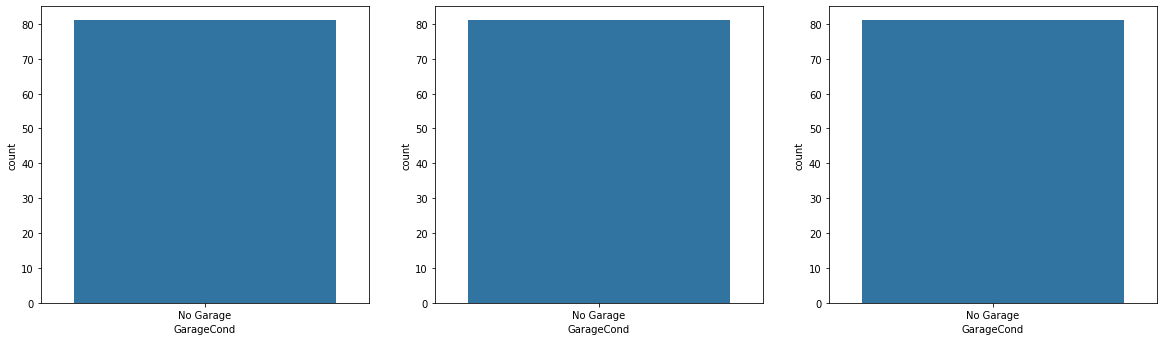

In [612]:
### focusing back on garage
### garage year built has missing values , checking all garage variables to handle it
print(hp['GarageYrBlt'].isnull().sum())
#print(hp.groupby.GarageCond.count())
#print(hp['GarageQual'].isnull().sum())
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
##sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = hp)
sns.countplot(x='GarageCond', data=hp[hp['GarageType']=='No Garage'])
plt.subplot(2,3,2)
##sns.boxplot(x = 'GarageType', y = 'SalePrice', data = hp)
sns.countplot(x='GarageCond', data=hp[hp['GarageQual']=='No Garage'])
plt.subplot(2,3,3)
sns.countplot(x='GarageCond', data=hp[hp['GarageFinish']=='No Garage'])
#sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = hp)



#### - 81 No Garage entries are there and for those 81 missing values at Garage Year Built
####  - GarageQual and garagecond hold same information


In [613]:
### Coverting GarageYrBlt to object and imputing the null values , if dropped No Garage information will be lost
hp['GarageYrBlt'] = hp['GarageYrBlt'].astype('object')

In [614]:
hp['GarageYrBlt'].dtype

dtype('O')

In [615]:
### We cannot impute using mode , imputing using min value available 
### Assumption - Early years like 1900's will not have anough houses with garages
hp['GarageYrBlt'] = hp['GarageYrBlt'].fillna('1900')

In [616]:
print(hp['GarageYrBlt'].isnull().sum())

0


In [617]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Now we do not have any null and missing values in dataset , however as per data dictionary , many varaibales are similar
- Condition1 , Condition2
- OverallQual , OverallCond
- Exterior1st , Exterior2nd
- ExterQual , ExterCond
- BsmtQual , BsmtCond
- BsmtFinType1 , BsmtFinType2
- GarageQual , GarageCond

### Using these in EDA to understand trends 
 - use categorical variables to see trends and drop any categorical if it does not show trends

In [618]:
### Dropping ID as it is not required
hp = hp.drop(['Id'],axis = 1)

In [619]:
hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

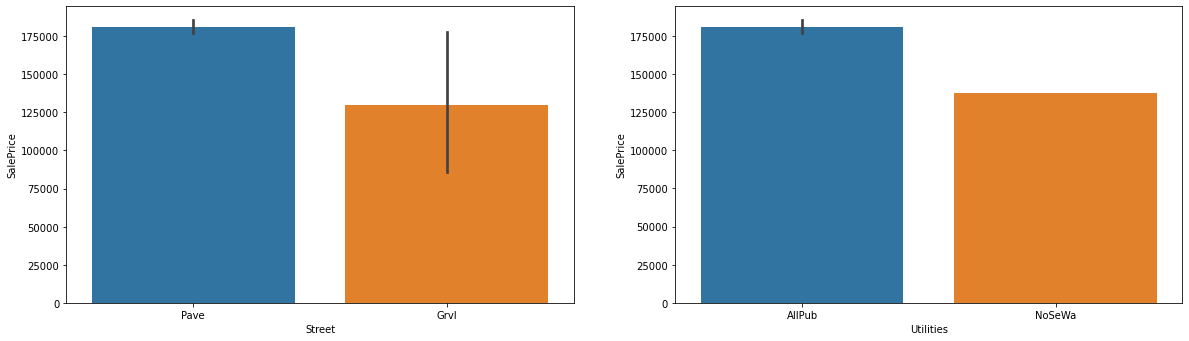

In [620]:
#### Checking Sales price with respect of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'Street', y = 'SalePrice', data = hp)
plt.subplot(2,2,2)
sns.barplot(x = 'Utilities', y = 'SalePrice', data = hp)

In [621]:
#### Looking at various categorical variables in repest to Saleprice

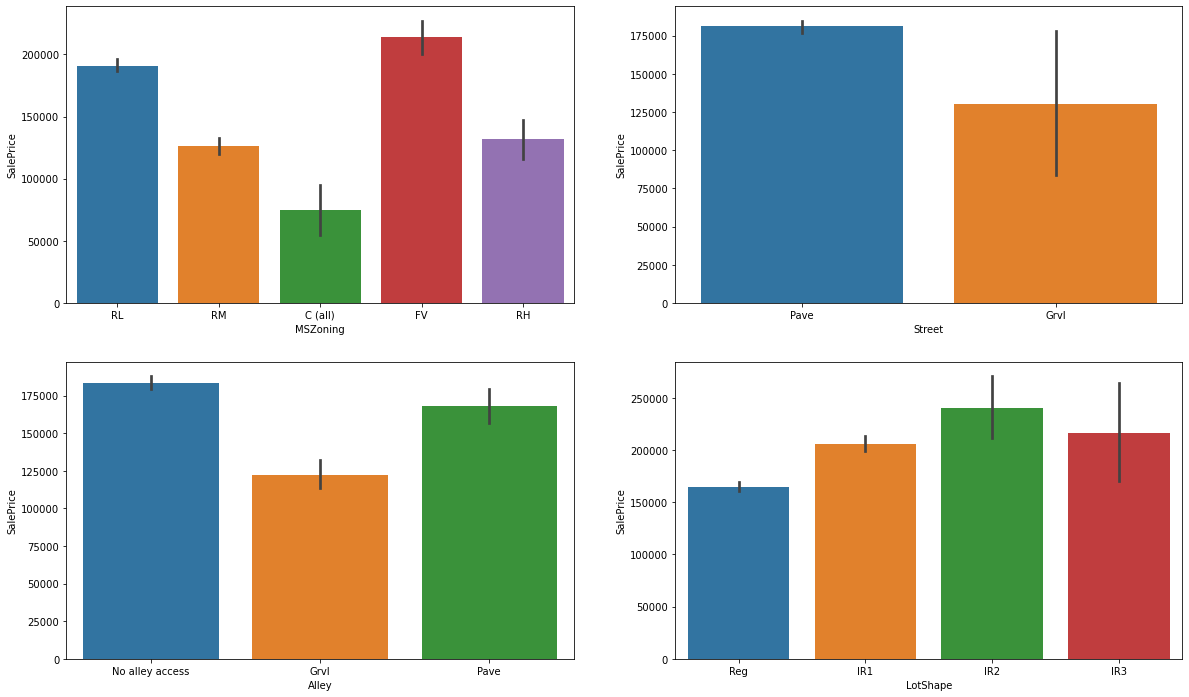

In [622]:
#### Checking Sales price with respect of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'MSZoning', y = 'SalePrice', data = hp)
plt.subplot(2,2,2)
sns.barplot(x = 'Street', y = 'SalePrice', data = hp)
plt.subplot(2,2,3)
sns.barplot(x = 'Alley', y = 'SalePrice', data = hp)
plt.subplot(2,2,4)
sns.barplot(x = 'LotShape', y = 'SalePrice', data = hp)
plt.show()

- Gravel Alleys and Gravel Street show less sales price
- Floating Village Residential , Low density Residentials have clearly higher sales price
- IR2 have higher sales price

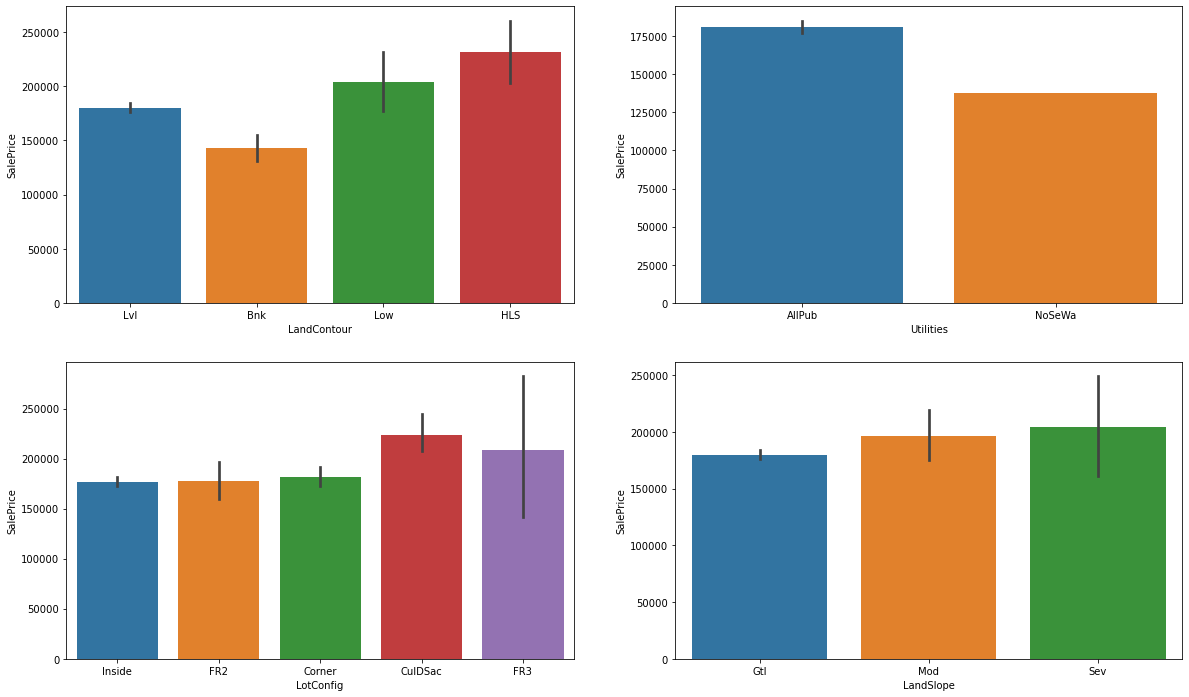

In [623]:
#### Checking Sales price with respect of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'LandContour', y = 'SalePrice', data = hp)
plt.subplot(2,2,2)
sns.barplot(x = 'Utilities', y = 'SalePrice', data = hp)
plt.subplot(2,2,3)
sns.barplot(x = 'LotConfig', y = 'SalePrice', data = hp)
plt.subplot(2,2,4)
sns.barplot(x = 'LandSlope', y = 'SalePrice', data = hp)
plt.show()

- Hillside - Significant slope from side to side have higher sales price
- All public Utilities (E,G,W,& S) have higher prices than just electricy and gas categorires
- Cul-de-sac has higher sales price
- Landcontour -  Hillside and Landslope -Sev shows that sales prices of Hillside properties are higher in comparison to others

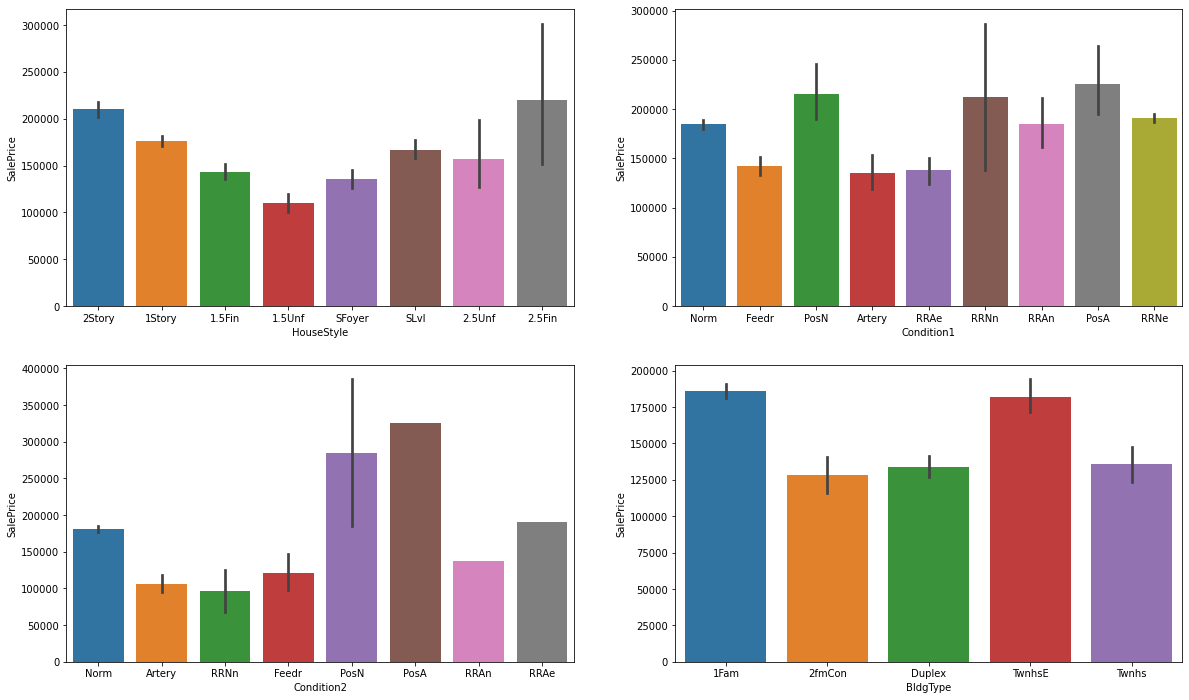

In [624]:
#### Checking Sales price with respect of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'HouseStyle', y = 'SalePrice', data = hp)
plt.subplot(2,2,2)
sns.barplot(x = 'Condition1', y = 'SalePrice', data = hp)
plt.subplot(2,2,3)
sns.barplot(x = 'Condition2', y = 'SalePrice', data = hp)
plt.subplot(2,2,4)
sns.barplot(x = 'BldgType', y = 'SalePrice', data = hp)
plt.show()

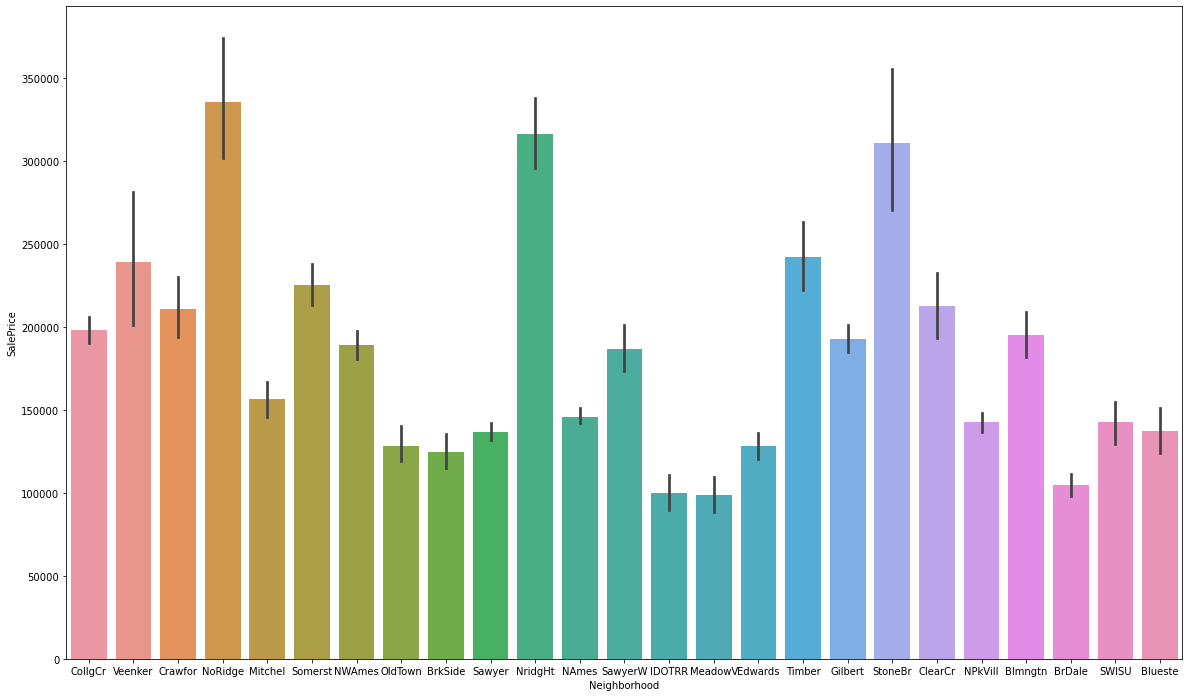

In [625]:
### neighbourhood
plt.figure(figsize=(20, 12))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = hp)
plt.show()

- House Style , 2 story and 2.5 furnished have higher sale price
- Northridge , Northridge Heights and Stone Brook have pricier houses
- Near positive off-site feature--park, greenbelt, etc and Adjacent to postive off-site feature have higher sales price

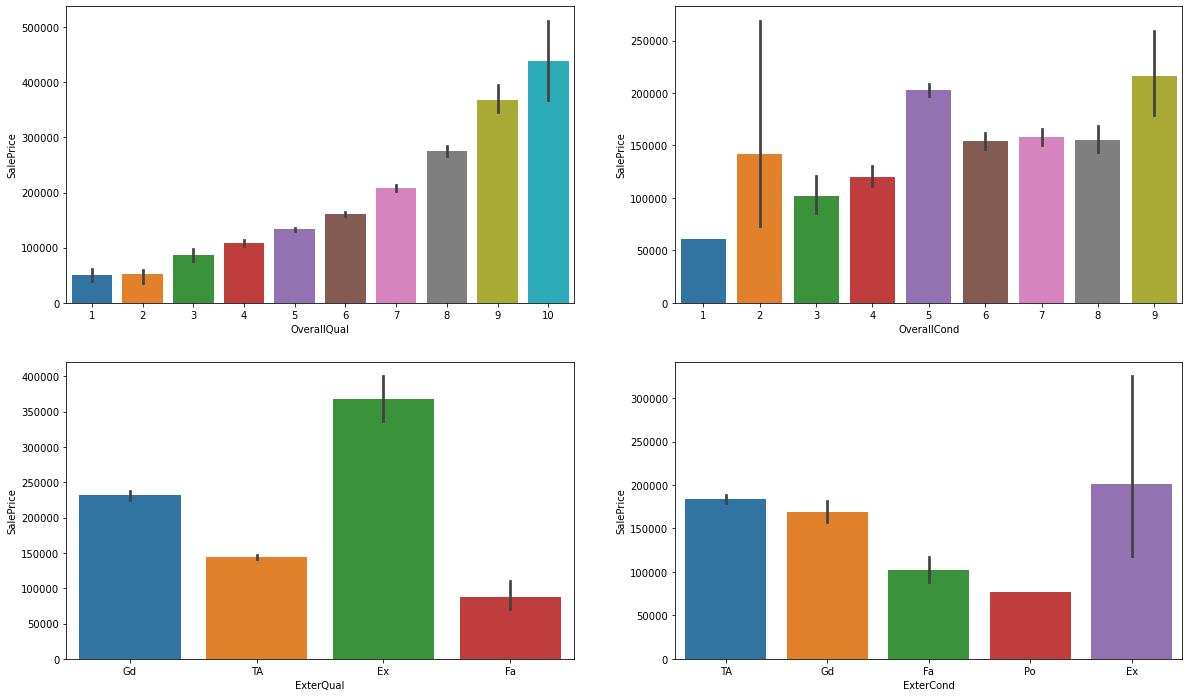

In [626]:
#### Checking Sales price with respect of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = hp)
plt.subplot(2,2,2)
sns.barplot(x = 'OverallCond', y = 'SalePrice', data = hp)
plt.subplot(2,2,3)
sns.barplot(x = 'ExterQual', y = 'SalePrice', data = hp)
plt.subplot(2,2,4)
sns.barplot(x = 'ExterCond', y = 'SalePrice', data = hp)
plt.show()

- Overall quality clearly shows a trend as the quality increases , price increases

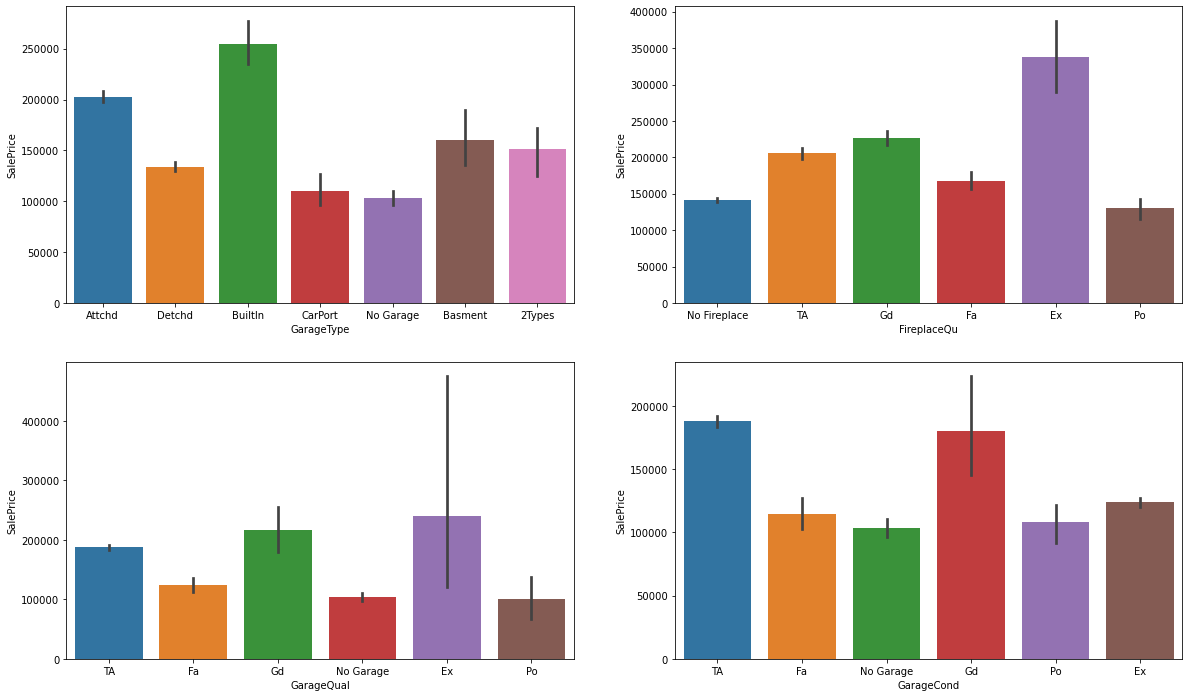

In [627]:
#### Checking Sales price with respect of categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'GarageType', y = 'SalePrice', data = hp)
plt.subplot(2,2,2)
sns.barplot(x = 'FireplaceQu', y = 'SalePrice', data = hp)
plt.subplot(2,2,3)
sns.barplot(x = 'GarageQual', y = 'SalePrice', data = hp)
plt.subplot(2,2,4)
sns.barplot(x = 'GarageCond', y = 'SalePrice', data = hp)
plt.show()

- Houses with Builtin garages have higher sales price

#### Numerical Data Exploration
To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [629]:
# all numeric (float and int) variables in the dataset
hp_numeric = hp.select_dtypes(include=['float64', 'int64'])
hp_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


- Some of these variables are not truly numerical , like MSSubClass , OverallQual, OverallCond , YrSold, YearBuilt , YearRemoreadd , MoSold etc
- We will remove them

In [630]:
# dropping non numeric variables 
hp_numeric = hp_numeric.drop(['MoSold','YrSold' ,'OverallQual','OverallCond' ,'YearBuilt','YearRemodAdd','MSSubClass'], axis=1)
hp_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

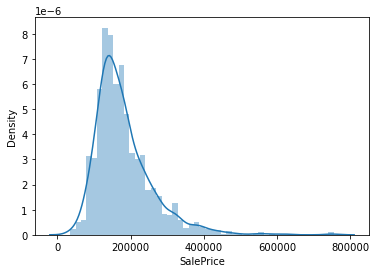

In [631]:
####Visualising Target Variable
sns.distplot(hp_numeric['SalePrice'])

#### Checking Correlation matricamongs numerical variables

In [632]:
### looking at correlation metrics
# correlation matrix
cor = hp_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,...,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.037469,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


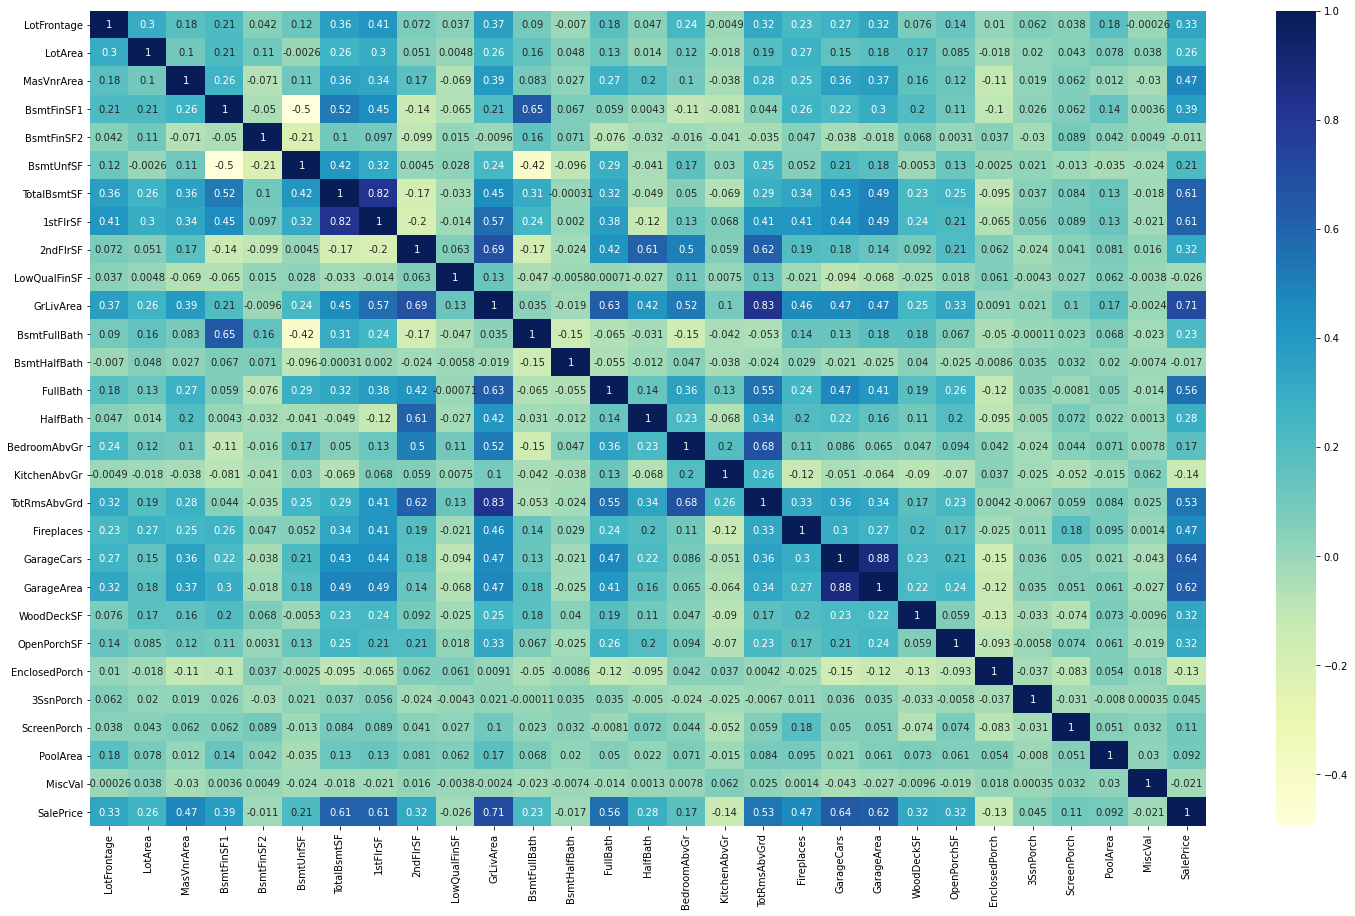

In [633]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### We can see that some of the variables are correlated , we will use VIF to get rid of multicolinearity


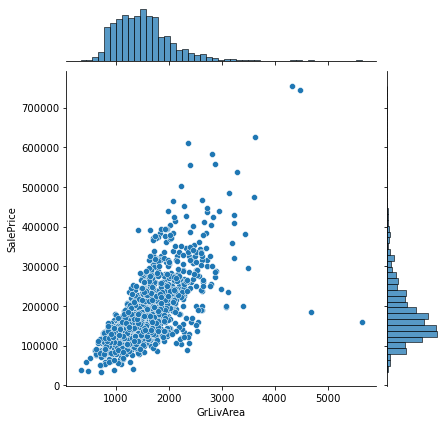

In [634]:
### Checking few linear variables to Sales price
sns.jointplot(x = hp['GrLivArea'], y = hp['SalePrice'])
plt.show()

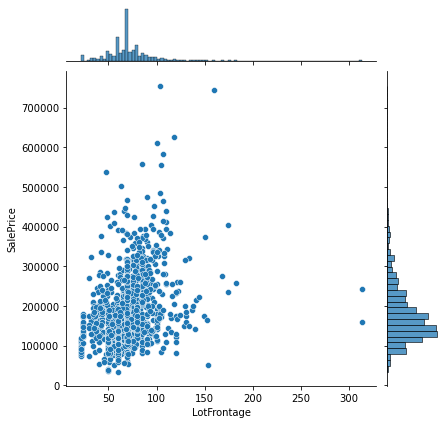

In [635]:
# Lot frontage vs SalePrice 
sns.jointplot(x = hp['LotFrontage'], y = hp['SalePrice'])
plt.show()

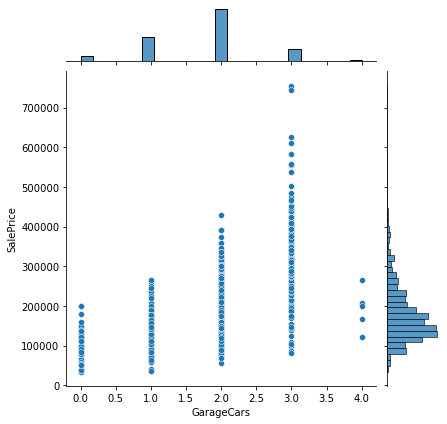

In [636]:
# Lot frontage vs SalePrice 
sns.jointplot(x = hp['GarageCars'], y = hp['SalePrice'])
plt.show()

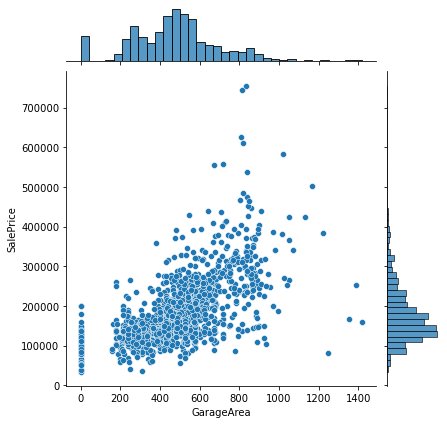

In [637]:
# Lot frontage vs SalePrice 
sns.jointplot(x = hp['GarageArea'], y = hp['SalePrice'])
plt.show()

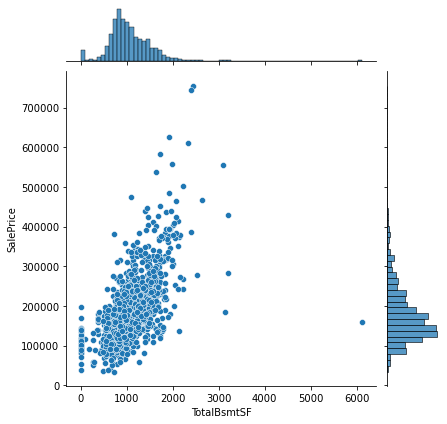

In [638]:
# Lot frontage vs SalePrice 
sns.jointplot(x = hp['TotalBsmtSF'], y = hp['SalePrice'])
plt.show()

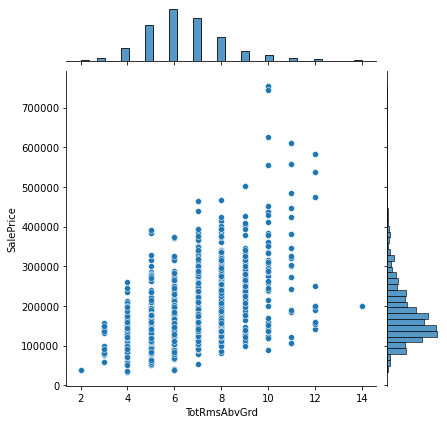

In [639]:
# Lot frontage vs SalePrice 
sns.jointplot(x = hp['TotRmsAbvGrd'], y = hp['SalePrice'])
plt.show()

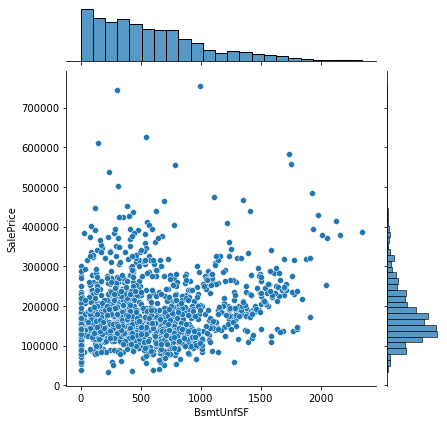

In [640]:
# Lot frontage vs SalePrice 
sns.jointplot(x = hp['BsmtUnfSF'], y = hp['SalePrice'])
plt.show()

In [641]:
#### 'MoSold','YrSold' ,'OverallQual','OverallCond' ,'YearBuilt','YearRemodAdd','MSSubClass' 'GarageYrBlt'
#### These categorical variables need to be handled before model building and if needed dropped

### Transforming  using the data dictionary


hp['MSSubClass'] = hp['MSSubClass'].replace([20] , '1-STORY 1946')
hp['MSSubClass'] = hp['MSSubClass'].replace([30] , '1-STORY 1945')
hp['MSSubClass'] = hp['MSSubClass'].replace([40] , '1-STORY W/FINISHED ATTIC')
hp['MSSubClass'] = hp['MSSubClass'].replace([45] , '1-1/2 STORY - UNFINISHED')
hp['MSSubClass'] = hp['MSSubClass'].replace([50] , '1-1/2 STORY FINISHED')
hp['MSSubClass'] = hp['MSSubClass'].replace([60] , '2-STORY 1946')
hp['MSSubClass'] = hp['MSSubClass'].replace([70] , '2-STORY 1945')
hp['MSSubClass'] = hp['MSSubClass'].replace([75] , '2-1/2 STORY ALL AGES')
hp['MSSubClass'] = hp['MSSubClass'].replace([80] , 'SPLIT OR MULTI-LEVEL')
hp['MSSubClass'] = hp['MSSubClass'].replace([85] , 'SPLIT FOYER')
hp['MSSubClass'] = hp['MSSubClass'].replace([90] , 'DUPLEX - ALL STYLES AND AGES')
hp['MSSubClass'] = hp['MSSubClass'].replace([120] , '1-STORY PUD')
hp['MSSubClass'] = hp['MSSubClass'].replace([150] , '1-1/2 STORY PUD')
hp['MSSubClass'] = hp['MSSubClass'].replace([160] , '2-STORY PUD')
hp['MSSubClass'] = hp['MSSubClass'].replace([180] , 'PUD - MULTILEVEL')
hp['MSSubClass'] = hp['MSSubClass'].replace([190] , '2 FAMILY CONVERSION')

In [642]:
### handling 'OverallQual','OverallCond' 

hp['OverallQual'] = hp['OverallQual'].replace([10] , 'Qual-Very Excellent')
hp['OverallQual'] = hp['OverallQual'].replace([9] , 'Qual-Excellent')
hp['OverallQual'] = hp['OverallQual'].replace([8] , 'Qual-Very Good')
hp['OverallQual'] = hp['OverallQual'].replace([7] , 'Qual-Good')
hp['OverallQual'] = hp['OverallQual'].replace([6] , 'Qual-Above Average')
hp['OverallQual'] = hp['OverallQual'].replace([5] , 'Qual-Average')
hp['OverallQual'] = hp['OverallQual'].replace([4] , 'Qual-Below Average')
hp['OverallQual'] = hp['OverallQual'].replace([3] , 'Qual-Fair')
hp['OverallQual'] = hp['OverallQual'].replace([2] , 'Qual-Poor')
hp['OverallQual'] = hp['OverallQual'].replace([1] , 'Qual-Very Poor')

hp['OverallCond'] = hp['OverallCond'].replace([10] , 'QualCond-Very Excellent')
hp['OverallCond'] = hp['OverallCond'].replace([9] , 'QualCond-Excellent')
hp['OverallCond'] = hp['OverallCond'].replace([8] , 'QualCond-Very Good')
hp['OverallCond'] = hp['OverallCond'].replace([7] , 'QualCond-Good')
hp['OverallCond'] = hp['OverallCond'].replace([6] , 'QualCond-Above Average')
hp['OverallCond'] = hp['OverallCond'].replace([5] , 'QualCond-Average')
hp['OverallCond'] = hp['OverallCond'].replace([4] , 'QualCond-Below Average')
hp['OverallCond'] = hp['OverallCond'].replace([3] , 'QualCond-Fair')
hp['OverallCond'] = hp['OverallCond'].replace([2] , 'QualCond-Poor')
hp['OverallCond'] = hp['OverallCond'].replace([1] , 'QualCond-Very Poor')

In [643]:
### Handling Year , determining age of property

hp['Age_prop'] = (hp['YrSold'] - hp['YearBuilt'])
hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_prop
0,2-STORY 1946,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,5
1,1-STORY 1946,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,31
2,2-STORY 1946,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,7
3,2-STORY 1945,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,91
4,2-STORY 1946,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,8


In [644]:
### dropping Year and month variables , no longer required
hp = hp.drop(['MoSold'], axis = 1)
hp= hp.drop(['YrSold'], axis = 1)
hp = hp.drop(['YearBuilt'], axis = 1)
hp = hp.drop(['YearRemodAdd'], axis = 1)
hp = hp.drop(['GarageYrBlt'], axis = 1)
hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age_prop
0,2-STORY 1946,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,WD,Normal,208500,5
1,1-STORY 1946,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,WD,Normal,181500,31
2,2-STORY 1946,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,WD,Normal,223500,7
3,2-STORY 1945,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,None,0,WD,Abnorml,140000,91
4,2-STORY 1946,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,WD,Normal,250000,8


In [645]:
### drop Street , Utilities as only two values and not very important
hp = hp.drop(['Street'], axis = 1)
hp = hp.drop(['Utilities'], axis = 1)

#### Data Cleaning and Transformations complete 
#### Model building and evaluations to follow

In [646]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [647]:
hp.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_prop
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000


### Moving into Model Building - Describe shows the data oversall seems to be free from Outliers
-  Linear model with RFE/VIF
-  Check accuracy
-  Apply Ridge/Lasso
-  Hyperparameter Tuning in Ridge lasso
-  Accuracy check and important variables checks

In [648]:
### Need to Create Dummy encodeing for all categorical variable
# creating dummy variables for categorical variables

# subset all categorical variables

hp_categorical = hp.select_dtypes(include=['object'])
hp_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2-STORY 1946,RL,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,1-STORY 1946,RL,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,2-STORY 1946,RL,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,2-STORY 1945,RL,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,2-STORY 1946,RL,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [649]:
# convert into dummies - one hot encoding
hp_dummies = pd.get_dummies(hp_categorical, drop_first=True)
hp_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED,MSSubClass_1-STORY 1945,MSSubClass_1-STORY 1946,MSSubClass_1-STORY PUD,MSSubClass_1-STORY W/FINISHED ATTIC,MSSubClass_2 FAMILY CONVERSION,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945,MSSubClass_2-STORY 1946,MSSubClass_2-STORY PUD,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [650]:
# drop categorical variables from main dataframe and then append the dummy encoded
hp = hp.drop(list(hp_categorical.columns), axis=1)

In [651]:
# concat dummy variables with X
hp = pd.concat([hp, hp_dummies], axis=1)

In [652]:
hp.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [653]:
#### So the final dataframe has 282 columns
hp.shape

(1460, 282)

In [654]:
### Split the dataframe HP into train and test and apply scalling (fit transform) on Train and Transform on Test
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

hp_train, hp_test = train_test_split(hp, train_size = 0.7, test_size = 0.3, random_state = 100)

In [655]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [658]:
#### Check numeric columns and use in scaling on Train data
hp_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [657]:
hp_train[hp_numeric.columns] = scaler.fit_transform(hp_train[hp_numeric.columns])

hp_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.16,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.00,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.00,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.00,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.0,...,0,0,0,0,1,0,0,0,1,0


In [659]:
###Scaling the test data

hp_test[hp_numeric.columns] = scaler.transform(hp_test[hp_numeric.columns])

hp_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.00000,0.109142,0.0,0.106164,0.141408,0.113889,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.047566,0.00000,0.000000,0.0,0.368151,0.140753,0.112963,0.416465,0.0,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.029930,0.02375,0.000000,0.0,0.529538,0.202455,0.203935,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.00000,0.000000,0.0,0.401969,0.153682,0.131250,0.415496,0.0,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.039309,0.00000,0.092488,0.0,0.245719,0.179378,0.172685,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [660]:
hp_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=282)

In [661]:
#### Dividing into X and Y sets for the model building
y_train = hp_train.pop('SalePrice')
X_train = hp_train

#### Building model
- We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

- RFE - Recursive feature elimination

In [662]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [663]:
# Running RFE with the output number of the variable equal to 100 (to start with becausewe have more that 280 Variables)
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 100)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [664]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 155),
 ('BsmtHalfBath', False, 169),
 ('FullBath', True, 1),
 ('HalfBath', False, 149),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 108),
 ('Fireplaces', False, 107),
 ('GarageCars', False, 9),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 62),
 ('OpenPorchSF', False, 45),
 ('EnclosedPorch', False, 110),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 47),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('Age_prop', False, 166),
 ('MSSubClass_1-1/2 STORY FINISHED', False, 135),
 ('MSSubClass_1-STORY 1945', False, 132),
 ('MSSubClass_1-STORY 1946', False, 66),
 ('MSSubClass_1-STORY PUD', False, 100),
 ('MSSubClass_1-STORY W/FINISHED ATTIC', False

In [665]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       '3SsnPorch', 'PoolArea', 'MiscVal', 'MSSubClass_2 FAMILY CONVERSION',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRNn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual_Qual-Excellent',
       'OverallQual_Qual-Poor', 'OverallQual_Qual-Very Excellent',
       'OverallQual_Qual-Very Good', 'OverallQual_Qual-Very Poor',
       'OverallCond_QualCond-Excellent', 'OverallCond_QualCond-Fair',
       'OverallCond_QualCond-Very Poor', 'RoofStyle_Mansard', 'RoofStyl

In [666]:
X_train.columns[~rfe.support_]

Index(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch',
       ...
       'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=181)

#### Lets take columns supported by RFE and use that in our model building
#### We will use statsmodel for all the statisctics to make informed decisions
#### Building model using statsmodel, for the detailed statistic

In [667]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [668]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [669]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [670]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:55:57   Log-Likelihood:                 2229.0
No. Observations:                1021   AIC:                            -4288.
Df Residuals:                     936   BIC:                            -3869.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [671]:
### LowQualFinSF ,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,HouseStyle_2.5Fin, HouseStyle_2.5Fin , OverallQual_Qual-Very Poor , OverallCond_QualCond-Very Poor ,RoofMatl_WdShake , Exterior1st_AsphShn 
### Exterior1st_CBlock ,Exterior2nd_AsphShn , Exterior2nd_Brk Cmn , Exterior2nd_Brk Cmn , Exterior2nd_CBlock , Exterior1st_Stone , BsmtCond_Po
### BsmtFinType2_No Basement , 
#GarageFinish_No Garage
#GarageQual_Gd
#GarageQual_No Garage
#GarageQual_Po
#GarageQual_TA
#GarageCond_Fa
#GarageCond_Gd
#GarageCond_Po
#GarageCond_TA
###

### Dropping on the basis of high P value
drop_list = ['MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'GarageType_No Garage',
        'GarageFinish_No Garage','GarageQual_Fa','GarageQual_Gd', 'GarageQual_No Garage', 'GarageQual_Po',
        'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd','GarageCond_No Garage','GarageCond_Po','GarageCond_TA',
        'Heating_Wall','BsmtFinType2_No Basement','BsmtFinType1_No Basement','BsmtQual_No Basement','BsmtCond_No Basement',
        'BsmtCond_Po','Foundation_Wood','Exterior2nd_AsphShn','Exterior1st_AsphShn','RoofStyle_Mansard','OverallCond_QualCond-Very Poor',
        'OverallQual_Qual-Very Poor','OverallQual_Qual-Poor','Foundation_Stone','Condition2_RRAe','Condition2_RRNn','MiscVal','3SsnPorch',
        'LowQualFinSF','Exterior2nd_CBlock']


In [672]:
X_train_new = X_train_rfe.drop(drop_list, axis = 1)

In [673]:
X_train_new.columns

Index(['const', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'PoolArea', 'MSSubClass_2 FAMILY CONVERSION',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'Condition2_PosA',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'OverallQual_Qual-Excellent',
       'OverallQual_Qual-Very Excellent', 'OverallQual_Qual-Very Good',
       'OverallCond_QualCond-Excellent', 'OverallCond_QualCond-Fair',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace',
       'Exte

In [674]:
## Rerruning after dropped columns basis high p value
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [675]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [676]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:56:14   Log-Likelihood:                 2201.5
No. Observations:                1021   AIC:                            -4281.
Df Residuals:                     960   BIC:                            -3980.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [677]:
### one more drop basis high p value

drop_list = ['RoofStyle_Shed','Exterior1st_CBlock']


In [678]:
drop_list

['RoofStyle_Shed', 'Exterior1st_CBlock']

In [679]:
X_train_new.columns

Index(['const', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'PoolArea', 'MSSubClass_2 FAMILY CONVERSION',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'Condition2_PosA',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'OverallQual_Qual-Excellent',
       'OverallQual_Qual-Very Excellent', 'OverallQual_Qual-Very Good',
       'OverallCond_QualCond-Excellent', 'OverallCond_QualCond-Fair',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace',
       'Exte

In [680]:
X_train_n = X_train_new.drop(drop_list, axis = 1)

In [681]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [682]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [683]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:56:26   Log-Likelihood:                 2201.5
No. Observations:                1021   AIC:                            -4281.
Df Residuals:                     960   BIC:                            -3980.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [684]:
#### Moving onto VIF and identifying Multicolinearity 
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
65,SaleCondition_Partial,inf
60,PoolQC_Gd,inf
40,RoofMatl_Metal,inf
41,RoofMatl_Roll,inf
42,RoofMatl_Tar&Grv,inf
43,RoofMatl_WdShake,inf
44,RoofMatl_WdShngl,inf
29,BldgType_Duplex,inf
28,BldgType_2fmCon,inf
38,RoofMatl_CompShg,inf


In [685]:
X_train_new = X_train_new.drop(['SaleCondition_Partial'], axis=1)

In [686]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
40,RoofMatl_Metal,inf
42,RoofMatl_Tar&Grv,inf
29,BldgType_Duplex,inf
60,PoolQC_Gd,inf
38,RoofMatl_CompShg,inf
17,MSSubClass_DUPLEX - ALL STYLES AND AGES,inf
16,MSSubClass_2 FAMILY CONVERSION,inf
39,RoofMatl_Membran,inf
41,RoofMatl_Roll,inf
28,BldgType_2fmCon,inf


In [687]:
X_train_new = X_train_new.drop(['BldgType_2fmCon'], axis=1)

In [688]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
42,RoofMatl_WdShake,inf
7,TotalBsmtSF,inf
41,RoofMatl_Tar&Grv,inf
17,MSSubClass_DUPLEX - ALL STYLES AND AGES,inf
43,RoofMatl_WdShngl,inf
39,RoofMatl_Metal,inf
59,PoolQC_Gd,inf
28,BldgType_Duplex,inf
6,BsmtUnfSF,inf
5,BsmtFinSF2,inf


In [689]:
#### VIF in control now , not showing Infinity anymore , build model 
###and check p values and remoce columns with hgh P , High VIF
X_train_new = X_train_new.drop(['RoofMatl_WdShake'], axis=1)

In [690]:
### Build the model again
X_train_lm1 = sm.add_constant(X_train_new)

In [691]:
### fit the model
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [692]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:56:59   Log-Likelihood:                 2201.5
No. Observations:                1021   AIC:                            -4281.
Df Residuals:                     960   BIC:                            -3980.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [693]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,BldgType_Duplex,inf
4,BsmtFinSF1,inf
5,BsmtFinSF2,inf
6,BsmtUnfSF,inf
7,TotalBsmtSF,inf
17,MSSubClass_DUPLEX - ALL STYLES AND AGES,inf
0,const,362024.94
15,PoolArea,1507.49
59,PoolQC_No Pool,1406.72
10,GrLivArea,185.89


In [694]:
### Build the model again
### Build the model again
X_train_new = X_train_new.drop(['Exterior1st_CBlock'], axis=1)

In [695]:
### fit the model
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [696]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     233.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:11   Log-Likelihood:                 2199.8
No. Observations:                1021   AIC:                            -4280.
Df Residuals:                     961   BIC:                            -3984.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [697]:
X_train_new = X_train_new.drop(['RoofStyle_Shed','RoofMatl_CompShg','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv'], axis=1)

In [698]:
### Build the model again
X_train_lm3 = sm.add_constant(X_train_new)

In [699]:
### fit the model
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [700]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     254.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:19   Log-Likelihood:                 2197.5
No. Observations:                1021   AIC:                            -4285.
Df Residuals:                     966   BIC:                            -4014.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [701]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,BldgType_Duplex,inf
6,BsmtUnfSF,inf
17,MSSubClass_DUPLEX - ALL STYLES AND AGES,inf
7,TotalBsmtSF,inf
4,BsmtFinSF1,inf
5,BsmtFinSF2,inf
0,const,361568.48
15,PoolArea,1507.12
53,PoolQC_No Pool,1406.39
10,GrLivArea,185.60


In [702]:
X_train_new = X_train_new.drop(['LandSlope_Sev'], axis=1)

In [703]:
### Build the model again
X_train_lm4 = sm.add_constant(X_train_new)

In [704]:
### fit the model
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

In [705]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:33   Log-Likelihood:                 2196.3
No. Observations:                1021   AIC:                            -4285.
Df Residuals:                     967   BIC:                            -4018.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [706]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,TotalBsmtSF,inf
27,BldgType_Duplex,inf
17,MSSubClass_DUPLEX - ALL STYLES AND AGES,inf
4,BsmtFinSF1,inf
5,BsmtFinSF2,inf
6,BsmtUnfSF,inf
0,const,361467.83
15,PoolArea,1506.59
52,PoolQC_No Pool,1405.93
10,GrLivArea,185.53


In [707]:
X_train_new = X_train_new.drop(['MSSubClass_DUPLEX - ALL STYLES AND AGES'], axis=1)

In [708]:
### Build the model again
X_train_lm5 = sm.add_constant(X_train_new)

In [709]:
### fit the model
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

In [710]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:45   Log-Likelihood:                 2196.3
No. Observations:                1021   AIC:                            -4285.
Df Residuals:                     967   BIC:                            -4018.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [711]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,BsmtFinSF1,inf
5,BsmtFinSF2,inf
6,BsmtUnfSF,inf
7,TotalBsmtSF,inf
0,const,361467.83
15,PoolArea,1506.59
51,PoolQC_No Pool,1405.93
10,GrLivArea,185.53
9,2ndFlrSF,123.85
8,1stFlrSF,107.02


In [712]:
X_train_new = X_train_new.drop(['MSSubClass_2 FAMILY CONVERSION'], axis=1)

In [713]:
### Build the model again
X_train_lm6 = sm.add_constant(X_train_new)

In [714]:
### fit the model
lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

In [715]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     263.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:56   Log-Likelihood:                 2194.7
No. Observations:                1021   AIC:                            -4283.
Df Residuals:                     968   BIC:                            -4022.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [716]:
X_train_new = X_train_new.drop(['BsmtFinSF1'], axis=1)

In [717]:
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)

In [718]:
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

In [719]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     263.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:01   Log-Likelihood:                 2194.7
No. Observations:                1021   AIC:                            -4283.
Df Residuals:                     968   BIC:                            -4022.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [720]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,361440.99
14,PoolArea,1506.45
49,PoolQC_No Pool,1405.80
9,GrLivArea,185.42
8,2ndFlrSF,123.71
7,1stFlrSF,106.95
17,MSZoning_RL,27.37
18,MSZoning_RM,21.33
47,PoolQC_Fa,17.99
15,MSZoning_FV,10.83


In [721]:
X_train_new = X_train_new.drop(['PoolQC_No Pool'], axis=1)

In [722]:
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)

In [723]:
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

In [724]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     254.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:16   Log-Likelihood:                 2168.4
No. Observations:                1021   AIC:                            -4233.
Df Residuals:                     969   BIC:                            -3976.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [725]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,304.45
9,GrLivArea,176.81
8,2ndFlrSF,117.79
7,1stFlrSF,101.79
17,MSZoning_RL,27.34
18,MSZoning_RM,21.30
15,MSZoning_FV,10.82
42,KitchenQual_TA,9.32
41,KitchenQual_Gd,7.76
37,BsmtQual_TA,5.77


### Dropped const from final dataframe to be used for Sklearn LM


In [726]:
X_train_new = X_train_new.drop(['2ndFlrSF','const'], axis=1)

In [727]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,MSZoning_RL,59.66
44,Functional_Typ,44.58
5,TotalBsmtSF,33.99
9,BedroomAbvGr,26.87
6,1stFlrSF,25.22
7,GrLivArea,22.49
8,FullBath,22.04
40,KitchenQual_TA,16.65
39,KitchenQual_Gd,11.93
11,GarageArea,11.41


In [728]:
X_train_new = X_train_new.drop(['MSZoning_RL'], axis=1)
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,TotalBsmtSF,33.88
43,Functional_Typ,33.00
9,BedroomAbvGr,26.30
6,1stFlrSF,24.95
7,GrLivArea,22.47
8,FullBath,21.17
39,KitchenQual_TA,14.65
11,GarageArea,11.33
38,KitchenQual_Gd,10.75
0,LotFrontage,9.80


In [729]:
X_train_new = X_train_new.drop(['TotalBsmtSF'], axis=1)
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
42,Functional_Typ,32.54
8,BedroomAbvGr,26.30
6,GrLivArea,22.10
7,FullBath,21.16
38,KitchenQual_TA,14.55
5,1stFlrSF,12.91
10,GarageArea,11.28
37,KitchenQual_Gd,10.69
0,LotFrontage,9.79
33,BsmtQual_TA,8.56


In [730]:
X_train_new = X_train_new.drop(['Functional_Typ'], axis=1)
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:42   Log-Likelihood:                 2022.2
No. Observations:                1021   AIC:                            -3948.
Df Residuals:                     973   BIC:                            -3712.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [731]:
X_train_new = X_train_new.drop(['SaleCondition_Alloca','PoolQC_Fa','BsmtQual_Gd','RoofMatl_Membran','MSZoning_FV','MSZoning_RH'], axis=1)
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     232.6
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:48   Log-Likelihood:                 2018.8
No. Observations:                1021   AIC:                            -3954.
Df Residuals:                     979   BIC:                            -3747.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [732]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,BedroomAbvGr,24.86
6,GrLivArea,21.33
7,FullBath,20.19
5,1stFlrSF,12.48
10,GarageArea,10.64
0,LotFrontage,9.52
34,KitchenQual_TA,9.40
33,KitchenQual_Gd,7.38
4,BsmtUnfSF,3.77
29,BsmtQual_TA,3.45


In [733]:
X_train_new = X_train_new.drop(['BedroomAbvGr','BsmtUnfSF','BsmtFinSF2'], axis=1)
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     243.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:57   Log-Likelihood:                 2002.7
No. Observations:                1021   AIC:                            -3927.
Df Residuals:                     982   BIC:                            -3735.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [734]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,FullBath,18.68
4,GrLivArea,16.67
3,1stFlrSF,11.01
7,GarageArea,10.60
0,LotFrontage,9.16
31,KitchenQual_TA,8.00
30,KitchenQual_Gd,6.77
26,BsmtQual_TA,3.10
6,KitchenAbvGr,2.51
15,BldgType_Duplex,2.42


In [735]:
X_train_new = X_train_new.drop(['LotFrontage'], axis=1)
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:59:07   Log-Likelihood:                 2001.3
No. Observations:                1021   AIC:                            -3927.
Df Residuals:                     983   BIC:                            -3739.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [736]:
X_train_new = X_train_new.drop(['Neighborhood_Somerst'], axis=1)
### Build the model again
X_train_lm7 = sm.add_constant(X_train_new)
### fit the model
lm7 = sm.OLS(y_train,X_train_lm7).fit() 
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:59:16   Log-Likelihood:                 2000.1
No. Observations:                1021   AIC:                            -3926.
Df Residuals:                     984   BIC:                            -3744.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [737]:
### calulate VIF for new lm1 after dropping holiday , hum , feb and const , windspeed , workingday
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,FullBath,18.34
3,GrLivArea,16.29
2,1stFlrSF,10.56
6,GarageArea,10.14
29,KitchenQual_TA,7.57
28,KitchenQual_Gd,6.52
24,BsmtQual_TA,3.02
5,KitchenAbvGr,2.51
13,BldgType_Duplex,2.41
0,LotArea,2.25


### This VIF and p values based elimination seems exhaustive
### lets check LM model using using this training set

In [738]:
X_train_new.columns

Index(['LotArea', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenAbvGr', 'GarageArea', 'PoolArea', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Condition2_PosA',
       'Condition2_PosN', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual_Qual-Excellent',
       'OverallQual_Qual-Very Excellent', 'OverallQual_Qual-Very Good',
       'OverallCond_QualCond-Excellent', 'OverallCond_QualCond-Fair',
       'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'BsmtQual_Fa', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Min1', 'Functional_Min2',
       'Functional_Sev', 'PoolQC_Gd', 'SaleType_Con', 'SaleType_New'],
      dtype='object')

In [739]:
# Checking all coeffiecients using SKlearn LM model
lm = LinearRegression()

# Fit a line
lm.fit(X_train_new, y_train)
print(lm.intercept_)
print(lm.coef_)

0.09753573377683267
[ 0.13672806  0.04466882  0.13103977  0.38715262  0.02120449 -0.10508415
  0.06932487  0.0622616  -0.01568206  0.02971626  0.0396352  -0.12000843
 -0.66052606 -0.01563293  0.01731524 -0.05196418  0.10092399  0.18781253
  0.04269011  0.03053327 -0.04897327  0.06804555  0.01695264 -0.02445436
 -0.0197322   0.03585753 -0.10652256 -0.06992099 -0.03822965 -0.05389059
 -0.01510264 -0.03237123 -0.14788371 -0.89522578  0.06113315  0.0378318 ]


In [740]:
#### Checking metrics
from sklearn.metrics import r2_score, mean_squared_error



In [741]:
### diving into x and y test
y_test = hp_test.pop('SalePrice')
X_test = hp_test

In [742]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [743]:
X_test_new.head()

,LotArea,MasVnrArea,1stFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,PoolArea,MSZoning_RM,Neighborhood_Crawfor,...,Heating_OthW,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Sev,PoolQC_Gd,SaleType_Con,SaleType_New
1436,0.035192,0.00000,0.113889,0.081860,0.333333,0.0,0.372355,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
57,0.047566,0.00000,0.112963,0.246349,0.666667,0.0,0.398449,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
780,0.029930,0.02375,0.203935,0.156610,0.666667,0.0,0.283498,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
382,0.036338,0.00000,0.131250,0.261145,0.666667,0.0,0.450635,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
1170,0.039309,0.00000,0.172685,0.130669,0.333333,0.0,0.252468,0.888889,0,0,...,0,0,0,1,0,0,0,1,0,0


In [744]:
X_train_new.head()

,LotArea,MasVnrArea,1stFlrSF,GrLivArea,FullBath,KitchenAbvGr,GarageArea,PoolArea,MSZoning_RM,Neighborhood_Crawfor,...,Heating_OthW,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Sev,PoolQC_Gd,SaleType_Con,SaleType_New
210,0.019306,0.00,0.113889,0.081860,0.333333,0.0,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.039403,0.16,0.231481,0.424289,0.666667,0.0,0.462623,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
239,0.033981,0.00,0.098611,0.201576,0.333333,0.0,0.155148,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
986,0.017931,0.00,0.145602,0.230015,0.333333,0.0,0.179831,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1416,0.046139,0.00,0.202315,0.355880,0.666667,0.5,0.394922,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [745]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train_new)
y_pred_test = lm.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.903416288974536
0.5164987681726902
1.1884653126920093
2.628226253334704
0.001164020874331057
0.006000516560124895


### Using RFE , VIF and p value based eliminations
- I have arraived at a model with 32 predictor variables
- The Train R2 score is .90 , but the test r2 score is 51 , which suggests overfitting
- Ridge and Lasso to be used to tackle overfitting via Hyperparameter tuning(Regularization)

##  Ridge Regression
- Using variables left after LM model for both ridge and Lasso
- Will also use variables left after RFE (using 100 starting variables

In [746]:
X_train_rfe.head()


,const,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_Con,SaleType_New,SaleCondition_Alloca,SaleCondition_Partial
210,1.0,0.157534,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,...,0,0,1,1,0,0,0,0,0,0
318,1.0,0.236301,0.039403,0.16,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,...,0,0,1,1,0,0,0,0,0,0
239,1.0,0.106164,0.033981,0.00,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,...,0,0,1,1,0,0,0,0,0,0
986,1.0,0.130137,0.017931,0.00,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,...,0,0,1,1,0,0,0,0,0,0
1416,1.0,0.133562,0.046139,0.00,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,...,0,0,1,1,0,0,0,0,0,0


In [747]:
### We will take the RFE supported variables and start with that
### first drop the constant and transform the test set with Rfe supported variables
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [748]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
X_test_rfe = X_test[X_train_rfe.columns]

In [749]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
# Using variables left after LM - X_train_new
params = {'alpha': [0.0001, 0.001, 0.01, 0.05,0.08,0.09,0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.09, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [750]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 0.1}


### fitting with 4.5 Alpha

In [753]:
#Fitting Ridge model for alpha = 4.5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.04250211  0.05156189  0.07916084  0.1659006   0.0697711  -0.04695537
  0.08510434 -0.00046357 -0.02260146  0.03843116  0.073777    0.00133098
 -0.07308516 -0.03140499 -0.00034609 -0.0007941   0.0986028   0.10251285
  0.04719149  0.02487032 -0.03707856  0.05419296  0.02314655 -0.02309581
 -0.01771991  0.04427048 -0.0115002  -0.07157191 -0.04361389 -0.06665122
 -0.01148617 -0.01787624 -0.01746745 -0.09107128  0.01661883  0.02807974]


In [754]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8351136432220929
0.8256587926212348
2.0289313123932136
0.9476876336782474
0.001987200110081502
0.002163670396525679



### Lasso



In [755]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.09, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [756]:

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [773]:
#### Fitting Ridge model for alpha = 0.0004 and printing coefficients which have been penalised

alpha =0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0004)

In [771]:
lasso.coef_

array([ 0.00000000e+00,  3.30768566e-02,  7.62884208e-02,  3.15731117e-01,
        3.06088038e-02, -6.48710110e-02,  8.33538087e-02,  0.00000000e+00,
       -2.18333822e-02,  2.70076911e-02,  5.49168236e-02, -0.00000000e+00,
       -2.12090238e-01, -1.88096932e-02,  0.00000000e+00, -0.00000000e+00,
        1.10414594e-01,  1.37127286e-01,  4.62540413e-02,  0.00000000e+00,
       -2.79133466e-02,  2.78953238e-02,  1.68417995e-02, -1.63412391e-02,
       -1.72984573e-02,  4.34700849e-02, -0.00000000e+00, -6.28050244e-02,
       -2.94316751e-02, -5.32924245e-02, -2.59905942e-04, -1.54143066e-02,
       -0.00000000e+00, -3.54401391e-01,  0.00000000e+00,  2.95644082e-02])

In [774]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8407196736207913
0.8169837167178715
1.9599489488040422
0.9948437953134961
0.0019196365806112069
0.002271332866012548


#### Lets observe the changes in the coefficients after regularization
#### On the DF returned using VIF and p value eliminations both ridge and lasso have similar r2 score

In [775]:
coefs = pd.DataFrame(index=X_train_new.columns)

In [776]:
coefs.rows = X_train_new.columns

In [777]:
coefs['Ridge'] = ridge.coef_
coefs['Lasso'] = lasso.coef_

In [778]:
pd.set_option('display.max_rows', None)
coefs.head(150)

,Ridge,Lasso
LotArea,0.042502,0.000000
MasVnrArea,0.051562,0.029202
1stFlrSF,0.079161,0.055964
GrLivArea,0.165901,0.292438
FullBath,0.069771,0.035002
KitchenAbvGr,-0.046955,-0.052478
GarageArea,0.085104,0.086242
PoolArea,-0.000464,-0.000000
MSZoning_RM,-0.022601,-0.022764
Neighborhood_Crawfor,0.038431,0.025938


In [779]:
# Check lasso model parameters
lasso_param = list(lasso.coef_ )
lasso_param.insert(0, lasso.intercept_)
lasso_param = [round(x, 3) for x in lasso_param]
cols = X_train_new.columns
cols = cols.insert(0, "constant")
list(zip(cols, lasso_param))

[('constant', 0.115),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.029),
 ('1stFlrSF', 0.056),
 ('GrLivArea', 0.292),
 ('FullBath', 0.035),
 ('KitchenAbvGr', -0.052),
 ('GarageArea', 0.086),
 ('PoolArea', -0.0),
 ('MSZoning_RM', -0.023),
 ('Neighborhood_Crawfor', 0.026),
 ('Neighborhood_NoRidge', 0.059),
 ('Condition2_PosA', -0.0),
 ('Condition2_PosN', -0.069),
 ('BldgType_Duplex', -0.019),
 ('HouseStyle_1.5Unf', 0.0),
 ('HouseStyle_2.5Fin', -0.0),
 ('OverallQual_Qual-Excellent', 0.114),
 ('OverallQual_Qual-Very Excellent', 0.123),
 ('OverallQual_Qual-Very Good', 0.048),
 ('OverallCond_QualCond-Excellent', 0.0),
 ('OverallCond_QualCond-Fair', -0.021),
 ('RoofMatl_WdShngl', 0.011),
 ('Exterior1st_BrkFace', 0.015),
 ('BsmtQual_Fa', -0.014),
 ('BsmtQual_TA', -0.017),
 ('BsmtExposure_Gd', 0.044),
 ('Heating_OthW', -0.0),
 ('KitchenQual_Fa', -0.059),
 ('KitchenQual_Gd', -0.026),
 ('KitchenQual_TA', -0.052),
 ('Functional_Min1', -0.0),
 ('Functional_Min2', -0.01),
 ('Functional_Sev', -0.0),
 ('PoolQ

In [780]:
# Check ridge model parameters
ridge_param = list(ridge.coef_ )
ridge_param.insert(0, ridge.intercept_)
ridge_param = [round(x, 3) for x in ridge_param]
cols = X_train_new.columns
cols = cols.insert(0, "constant")
list(zip(cols, ridge_param))

[('constant', 0.131),
 ('LotArea', 0.043),
 ('MasVnrArea', 0.052),
 ('1stFlrSF', 0.079),
 ('GrLivArea', 0.166),
 ('FullBath', 0.07),
 ('KitchenAbvGr', -0.047),
 ('GarageArea', 0.085),
 ('PoolArea', -0.0),
 ('MSZoning_RM', -0.023),
 ('Neighborhood_Crawfor', 0.038),
 ('Neighborhood_NoRidge', 0.074),
 ('Condition2_PosA', 0.001),
 ('Condition2_PosN', -0.073),
 ('BldgType_Duplex', -0.031),
 ('HouseStyle_1.5Unf', -0.0),
 ('HouseStyle_2.5Fin', -0.001),
 ('OverallQual_Qual-Excellent', 0.099),
 ('OverallQual_Qual-Very Excellent', 0.103),
 ('OverallQual_Qual-Very Good', 0.047),
 ('OverallCond_QualCond-Excellent', 0.025),
 ('OverallCond_QualCond-Fair', -0.037),
 ('RoofMatl_WdShngl', 0.054),
 ('Exterior1st_BrkFace', 0.023),
 ('BsmtQual_Fa', -0.023),
 ('BsmtQual_TA', -0.018),
 ('BsmtExposure_Gd', 0.044),
 ('Heating_OthW', -0.012),
 ('KitchenQual_Fa', -0.072),
 ('KitchenQual_Gd', -0.044),
 ('KitchenQual_TA', -0.067),
 ('Functional_Min1', -0.011),
 ('Functional_Min2', -0.018),
 ('Functional_Sev', -0.

##### Using the RFE supported columns to find a better mix of variabes if possible

## RIDGE

In [781]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
# Using variables left after LM - X_train_rfe
params = {'alpha': [0.0001, 0.001, 0.01, 0.05,0.08,0.09,0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train_rfe, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.09, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [782]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [787]:
#Fitting Ridge model for alpha = 13 and printing coefficients which have been penalised
alpha = 13
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 1.12068082e-02  2.11004126e-02  3.93337245e-02  3.92035646e-02
  1.47768485e-02  9.05299141e-03  4.32395714e-02  6.49707372e-02
  5.57527386e-02 -6.41086097e-03  7.54230201e-02  5.76731995e-02
  1.52092135e-02 -1.56791948e-02  5.60724554e-02  1.06127890e-02
  3.50431394e-04  3.04250712e-03 -7.66898600e-03 -1.36122557e-02
  2.09484516e-03  6.95939852e-03  2.19319115e-02 -6.00468157e-03
  1.11143866e-02  2.88920563e-02  6.31198004e-02  1.28761936e-02
  3.57336985e-03 -2.88755952e-02 -2.00652984e-04  1.15864104e-03
 -7.66898600e-03 -1.36122557e-02  1.00785762e-03  1.85175440e-03
  7.13700906e-02 -7.53225312e-03  6.38242632e-02  4.39829497e-02
 -5.74438242e-03  1.90240052e-02 -1.87763177e-02 -5.74438242e-03
  7.28191950e-03  4.72253461e-03 -2.02151170e-03  5.66265893e-03
  5.86472503e-04 -6.51422291e-04 -4.15397733e-03  5.95527740e-03
  3.12162727e-02  9.30708143e-04  2.64153149e-02 -3.03570499e-03
  9.30708143e-04 -3.03570499e-03  3.98504666e-03  2.24437599e-03
 -3.87505068e-02 -3.68549

In [788]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8355225409811864
0.8161283331713586
2.0238998138313904
0.9994935073423967
0.001982272099736915
0.0022819486469004492


### Using RFE supported variables gave a slightly better model when using Ridge

## Checking LASSO with RFE supported varaiables

In [789]:
lasso = Lasso()

# cross validation
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.09, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [791]:

# Printing the best hyperparameter alpha
print(model_cv2.best_params_)

{'alpha': 0.0001}


In [792]:
#### Fitting Ridge model for alpha = 0.0004 and printing coefficients which have been penalised

alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0005)

In [793]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8307259032832057
0.8308316621119471
2.0829225772049975
0.919568839959392
0.002040080878751222
0.00209947223735021


In [794]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.83644747e-02,  5.12139407e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.96154367e-02,
        0.00000000e+00, -0.00000000e+00,  2.78632489e-01,  4.11313949e-02,
        0.00000000e+00, -1.63600352e-02,  6.43780803e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.88703932e-02,
        0.00000000e+00,  0.00000000e+00,  1.99471340e-02, -4.96535348e-03,
        0.00000000e+00,  2.17378142e-02,  6.25251180e-02,  9.83543564e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -6.57139280e-05,  0.00000000e+00, -0.00000000e+00,
        1.05485415e-01, -0.00000000e+00,  1.00905291e-01,  4.71622410e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [795]:
### Clearly Lasso is performing better and is also pushing the non important coeffs towards 0 , 
###so it is btter for model selection

###Checking Coeffs now

coefs1 = pd.DataFrame(index=X_train_rfe.columns)
coefs1.rows = X_train_rfe.columns
coefs1['Ridge'] = ridge.coef_
coefs1['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
coefs1.head(100)


,Ridge,Lasso
LotFrontage,0.011207,0.000000
LotArea,0.021100,0.000000
MasVnrArea,0.039334,0.018364
BsmtFinSF1,0.039204,0.005121
BsmtFinSF2,0.014777,0.000000
BsmtUnfSF,0.009053,-0.000000
TotalBsmtSF,0.043240,0.000000
1stFlrSF,0.064971,0.029615
2ndFlrSF,0.055753,0.000000
LowQualFinSF,-0.006411,-0.000000


In [796]:
print(ridge.intercept_)
print(lasso.intercept_)


0.109447119799205
0.08858962300858192


In [797]:
### Sorting the LASSO Model selected to find top 5 varaibles
coefs1.sort_values(by=['Lasso'], ascending=False)

,Ridge,Lasso
GrLivArea,0.075423,0.278632
OverallQual_Qual-Excellent,0.071370,0.105485
OverallQual_Qual-Very Excellent,0.063824,0.100905
GarageArea,0.056072,0.064378
Neighborhood_NoRidge,0.063120,0.062525
OverallQual_Qual-Very Good,0.043983,0.047162
BsmtExposure_Gd,0.043134,0.042281
FullBath,0.057673,0.041131
1stFlrSF,0.064971,0.029615
Neighborhood_Crawfor,0.028892,0.021738


In [798]:
### Removing the top 5 Varaibales from LASSO and rechecking the model
X_train_rfe = X_train_rfe.drop(['GrLivArea','OverallQual_Qual-Excellent','OverallQual_Qual-Very Excellent','GarageArea','Neighborhood_NoRidge'], axis=1)
X_test_rfe = X_test[X_train_rfe.columns]


In [799]:
lasso = Lasso()

# cross validation
model_cv3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv3.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.09, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [800]:
# Printing the best hyperparameter alpha
print(model_cv3.best_params_)

{'alpha': 0.0001}


In [801]:
#### Fitting Ridge model for alpha = 0.0004 and printing coefficients which have been penalised

alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0005)

In [458]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8076995754503467
0.7929864870335893
2.366262196458318
1.1252884455270447
0.002317592748734885
0.0025691517021165402


### After dropping 5 topmost variables , identifying the new top variables for Lasso

In [802]:
coefs2 = pd.DataFrame(index=X_train_rfe.columns)
coefs2.rows = X_train_rfe.columns
coefs2['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
coefs2.head(95)

,Lasso
LotFrontage,0.000000
LotArea,0.000000
MasVnrArea,0.061064
BsmtFinSF1,0.010485
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000
TotalBsmtSF,0.014704
1stFlrSF,0.343433
2ndFlrSF,0.135753
LowQualFinSF,-0.000000


In [803]:
print(lasso.intercept_)
coefs2.sort_values(by=['Lasso'], ascending=False)

0.13311763887738487


,Lasso
1stFlrSF,0.343433
2ndFlrSF,0.135753
MasVnrArea,0.061064
BsmtExposure_Gd,0.046292
FullBath,0.040272
OverallQual_Qual-Very Good,0.038751
Functional_Typ,0.026975
GarageCond_TA,0.024202
MSZoning_RL,0.018011
RoofMatl_WdShngl,0.016483


#### Overall the LASSO model built on RFE supported features gave better results in terms of accuracy with 30 predictors
- r2 on train  0.8307259032832057
- r2 on test   0.8308316621119471
- rss1(train)  2.0829225772049975
- rss2(test)   0.919568839959392
- mse(train)   0.002040080878751222
- mse(test)    0.00209947223735021